# Info
Purpose:

    Describe the details ...

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:
    
    Written: Samuel LeBlanc, Santa Cruz, CA, 2020-09-17
    Modified:


# Prepare python environment

In [1]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
import os


In [2]:
name = 'KORUS'
vv = 'v1'
fp = getpath(name)


Return path named:  KORUS /data/sam/KORUS-AQ/


# Load files

## Load DIAL

In [3]:
da, da_dict = lu.load_hdf(fp+'data_other/korusaq-DIAL_DC8_20160519_R1.h5',all_values=True)

Outputting the Data subdatasets:
0: [1x2854] //Data_Products/AOT (64-bit floating-point)
1: [2x2854] //Data_Products/AOT_alts (64-bit floating-point)
2: [678x2854] //Data_Products/Aerosol_ID_prfl (64-bit floating-point)
3: [2x2854] //Data_Products/Cloud_Bases (64-bit floating-point)
4: [678x2854] //Data_Products/Cloud_Mask_prfl (64-bit floating-point)
5: [2x2854] //Data_Products/Cloud_Tops (64-bit floating-point)
6: [678x2854] //Data_Products/Column_AOT_prfl (64-bit floating-point)
7: [678x2854] //Data_Products/O3_prfl (64-bit floating-point)
8: [678x2854] //Data_Products/Sa_532nm_prfl (64-bit floating-point)
9: [678x2854] //Data_Products/aerdep_1064nm_prfl (64-bit floating-point)
10: [678x2854] //Data_Products/aerdep_532nm_prfl (64-bit floating-point)
11: [678x2854] //Data_Products/bsc_1064nm_prfl (64-bit floating-point)
12: [678x2854] //Data_Products/bsc_532nm_prfl (64-bit floating-point)
13: [678x2854] //Data_Products/bsr_1064nm_prfl (64-bit floating-point)
14: [678x2854] //Data_Pro

In [19]:
np.nanmax(da['//Data_Products/ext_532nm_prfl'])

0.6872985403821488

# Plot out data

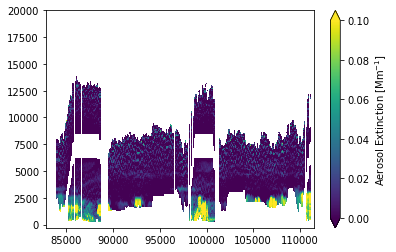

In [4]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime'],da['//Nav_Data/Altitudes'],da['//Data_Products/ext_532nm_prfl'],
           vmin=0,vmax=0.1)
plt.colorbar(extend='both',label='Aerosol Extinction [Mm$^{-1}$]')

In [5]:
np.nanmin(da['//Data_Products/bsc_532nm_prfl']),np.nanmean(da['//Data_Products/bsc_532nm_prfl'])

(-0.0006215746048111495, 0.00039182367441113335)

In [6]:
 norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max())

NameError: name 'Z' is not defined

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 678

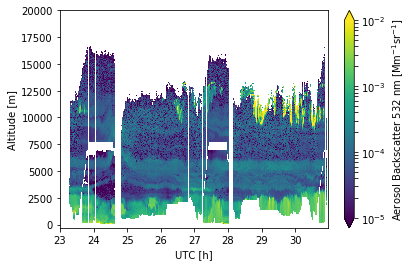

In [10]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime']/60.0/60.0,da['//Nav_Data/Altitudes'],da['//Data_Products/bsc_532nm_prfl'],
            norm=colors.LogNorm(vmin=0.00001, vmax=0.01))
plt.xlabel('UTC [h]')
plt.ylabel('Altitude [m]')
plt.colorbar(extend='both',label='Aerosol Backscatter 532 nm [Mm$^{-1}$sr$^{-1}$]')
plt.scatter(da['//Nav_Data/Midtime'][cld_mask==1]/60.0/60.0,da['//Nav_Data/Altitudes'][cld_mask==1],'.r')
#plt.pcolor(da['//Nav_Data/Midtime']/60.0/60.0,da['//Nav_Data/Altitudes'],cld_mask,cmap=plt.cm.autumn)

In [11]:
cld_mask.shape

(678, 2854)

In [12]:
da['//Nav_Data/Midtime'].shape

(1, 2854)

In [13]:
da['//Nav_Data/Altitudes'].shape

(678, 1)

In [18]:
nx,ny = cld_mask.shape
alts, time = [],[]
for i in xrange(nx):
    for j in xrange (ny):
        if cld_mask[i,j] ==1.0:
            alts.append(da['//Nav_Data/Altitudes'][i])
            time.append(da['//Nav_Data/Midtime'][0,j])
time = np.array(time)
alts = np.array(alts)

In [45]:
nx,ny = cld_mask.shape
alts_depol, time_depol = [],[]
for i in xrange(nx):
    for j in xrange (ny):
        if (da['//Data_Products/depol_532nm_prfl'][i,j] > 0.1) &\
           (da['//Data_Products/bsc_532nm_prfl'][i,j]>0.0001) &\
           (da['//Nav_Data/Altitudes'][i] > 7500.0):
            alts_depol.append(da['//Nav_Data/Altitudes'][i])
            time_depol.append(da['//Nav_Data/Midtime'][0,j])
time_depol = np.array(time_depol)
alts_depol = np.array(alts_depol)

In [9]:
cld_mask = da['//Data_Products/Cloud_Mask_prfl']
cld_mask[cld_mask==0] = np.nan

<IPython.core.display.Javascript object>


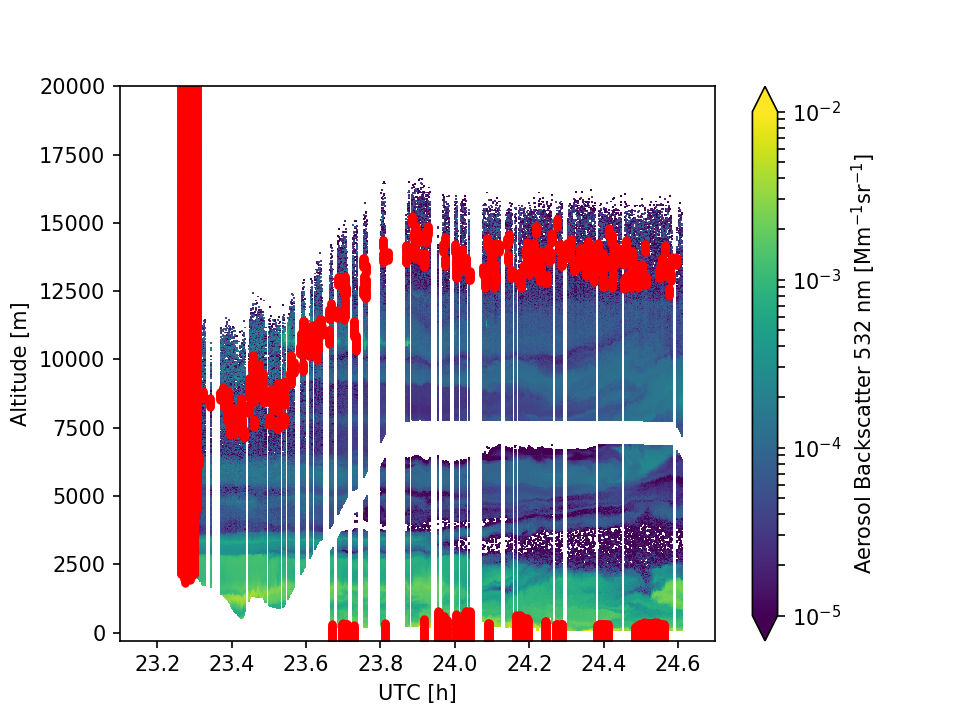

(23.1, 24.7)

In [25]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime']/60.0/60.0,da['//Nav_Data/Altitudes'],da['//Data_Products/bsc_532nm_prfl'],
            norm=colors.LogNorm(vmin=0.00001, vmax=0.01))
plt.xlabel('UTC [h]')
plt.ylabel('Altitude [m]')
plt.colorbar(extend='both',label='Aerosol Backscatter 532 nm [Mm$^{-1}$sr$^{-1}$]')
plt.plot(time/3600.0,alts,'.r')
plt.xlim(23.1,24.7)

<IPython.core.display.Javascript object>


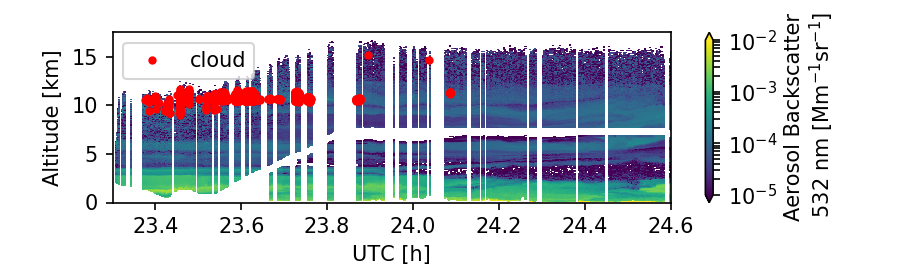

In [68]:
plt.figure(figsize=(6,1.8))
plt.pcolor(da['//Nav_Data/Midtime']/60.0/60.0,da['//Nav_Data/Altitudes']/1000.0,da['//Data_Products/bsc_532nm_prfl'],
            norm=colors.LogNorm(vmin=0.00001, vmax=0.01))
plt.xlabel('UTC [h]')
plt.ylabel('Altitude [km]')
plt.colorbar(extend='both',label='Aerosol Backscatter\n 532 nm [Mm$^{-1}$sr$^{-1}$]')
plt.plot(time_depol/3600.0,alts_depol/1000.0,'.r',label='cloud')
plt.legend(frameon=True)
plt.xlim(23.3,24.6)
plt.ylim(0,17.500)
plt.subplots_adjust(bottom=0.25)
plt.savefig(fp+'plot/KORUS_DIAL_20180519_aer_bcsc_cloud.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


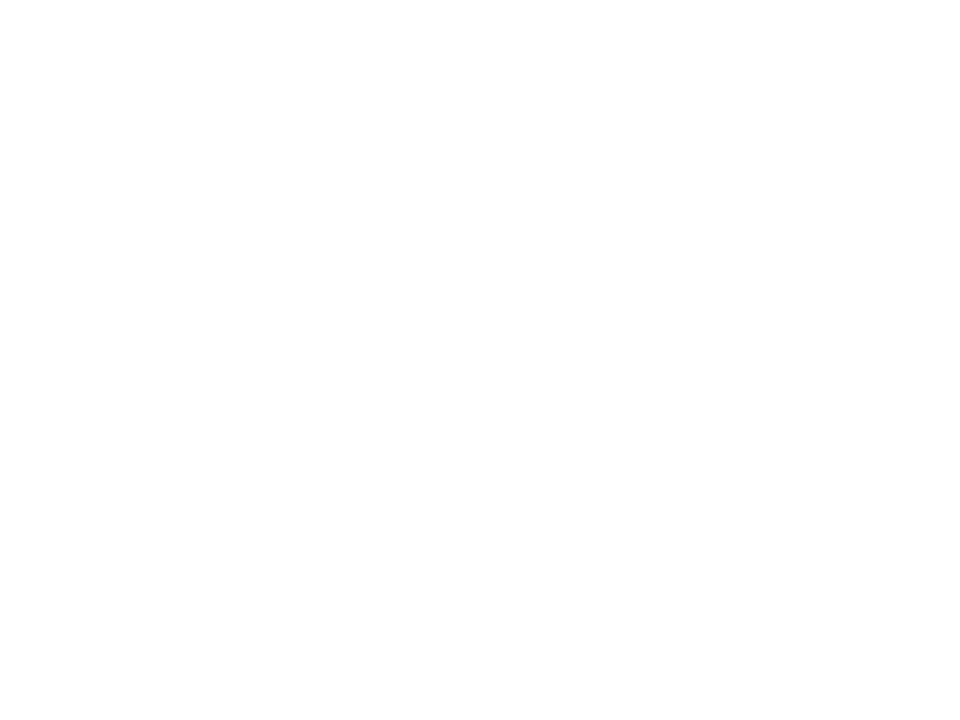

TypeError: len() of unsized object

In [57]:
plt.figure()
plt.contourf(da['//Nav_Data/Midtime'].flatten()/60.0/60.0,da['//Nav_Data/Altitudes'].flatten(),da['//Data_Products/bsc_532nm_prfl'],
            norm=colors.LogNorm(vmin=0.00001, vmax=0.01),levels=15)
plt.xlabel('UTC [h]')
plt.ylabel('Altitude [m]')
plt.colorbar(extend='both',label='Aerosol Backscatter 532 nm [Mm$^{-1}$sr$^{-1}$]')
plt.plot(time_depol/3600.0,alts_depol,'.r')
plt.xlim(23.3,25.3)

<IPython.core.display.Javascript object>


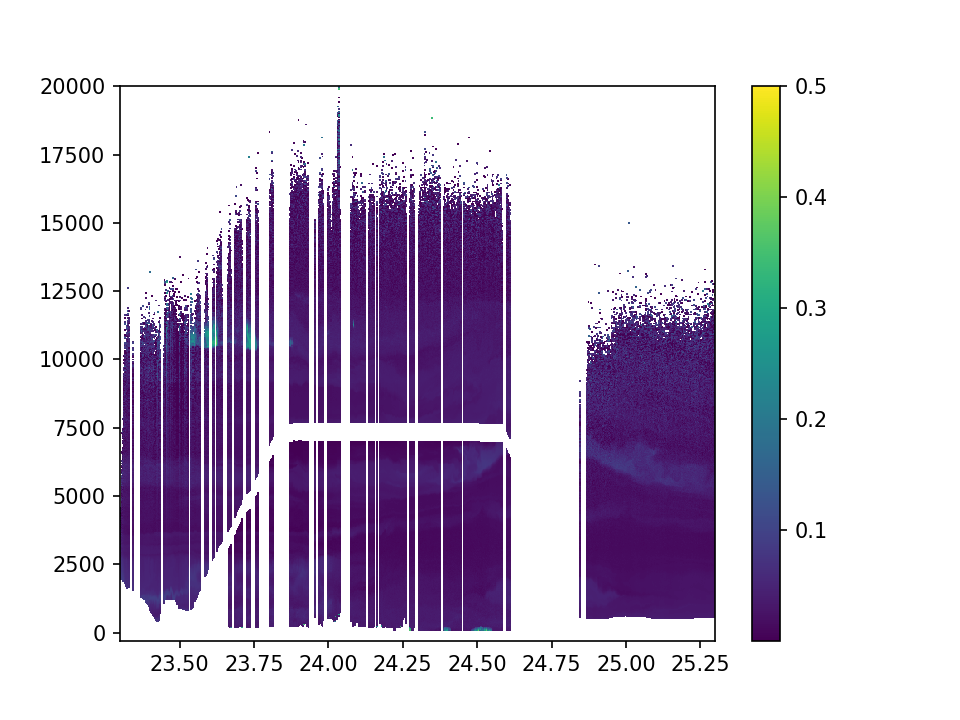

(23.3, 25.3)

In [50]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime'].flatten()/60.0/60.0,da['//Nav_Data/Altitudes'].flatten(),da['//Data_Products/depol_532nm_prfl'],
          vmin=0.00001, vmax=0.5)
plt.colorbar()
plt.xlim(23.3,25.3)

<IPython.core.display.Javascript object>


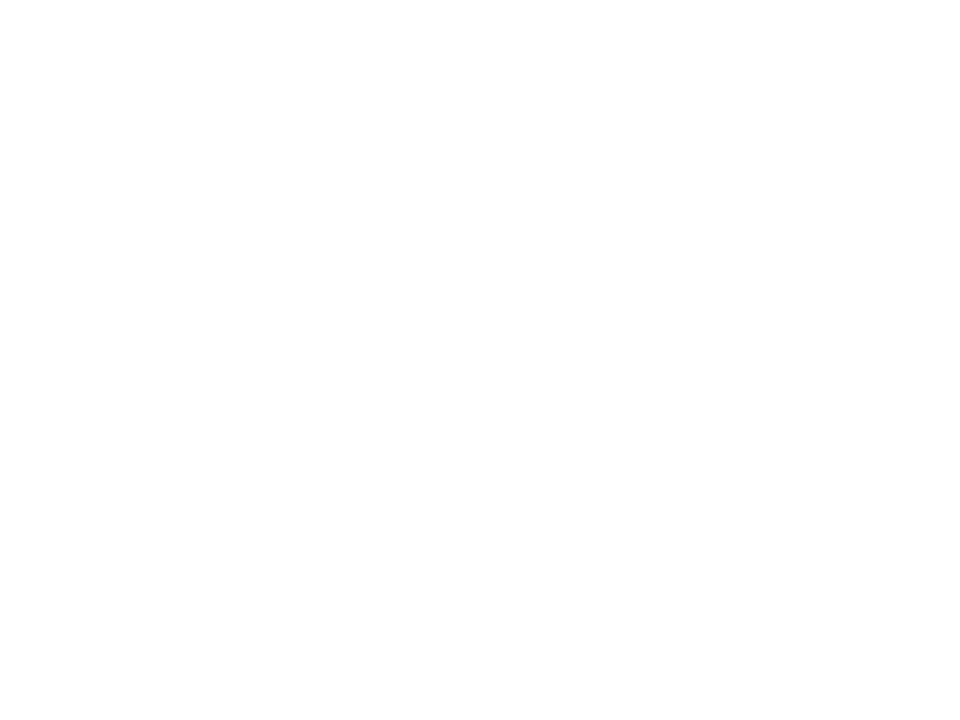

ValueError: x and y must be equal-length 1-D arrays

In [58]:
plt.figure()
plt.tricontour(da['//Nav_Data/Midtime'].flatten()/60.0/60.0,da['//Nav_Data/Altitudes'].flatten(),da['//Data_Products/depol_532nm_prfl'],
          vmin=0.00001, vmax=0.5,levels=4, linewidths=0.5, colors='k')
#plt.colorbar()
plt.xlim(23.3,25.3)

<IPython.core.display.Javascript object>


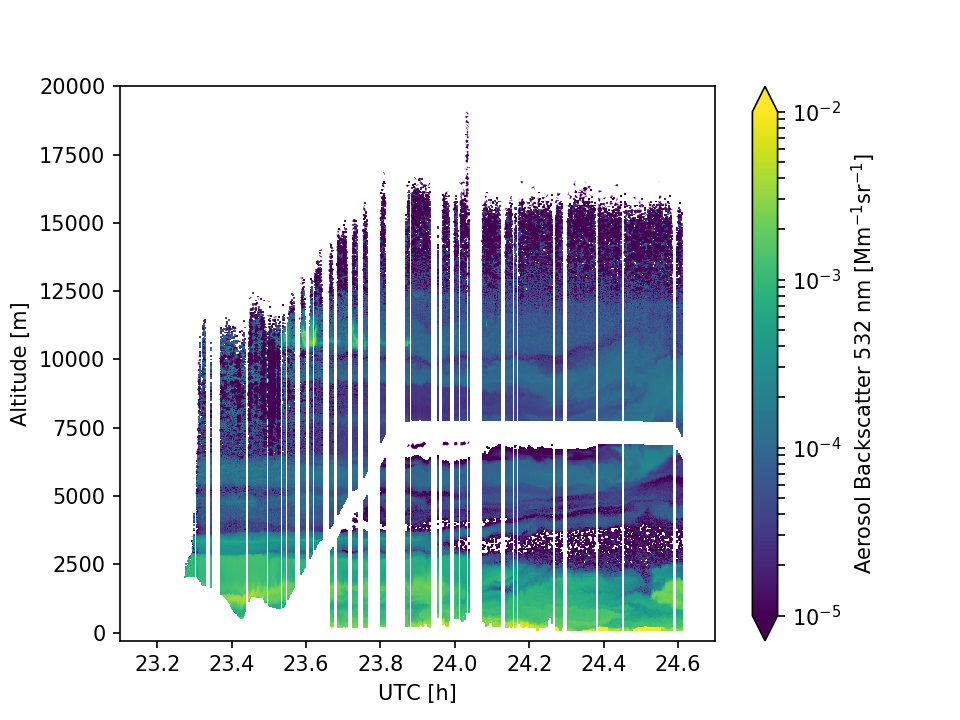

(23.1, 24.7)

In [33]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime']/60.0/60.0,da['//Nav_Data/Altitudes'],da['//Data_Products/bsc_532nm_prfl'],
            norm=colors.LogNorm(vmin=0.00001, vmax=0.01))
plt.xlabel('UTC [h]')
plt.ylabel('Altitude [m]')
plt.colorbar(extend='both',label='Aerosol Backscatter 532 nm [Mm$^{-1}$sr$^{-1}$]')
plt.contour(da['//Nav_Data/Midtime'].flatten()/60.0/60.0,da['//Nav_Data/Altitudes'].flatten(),da['//Data_Products/depol_532nm_prfl'])
plt.xlim(23.1,24.7)

<IPython.core.display.Javascript object>


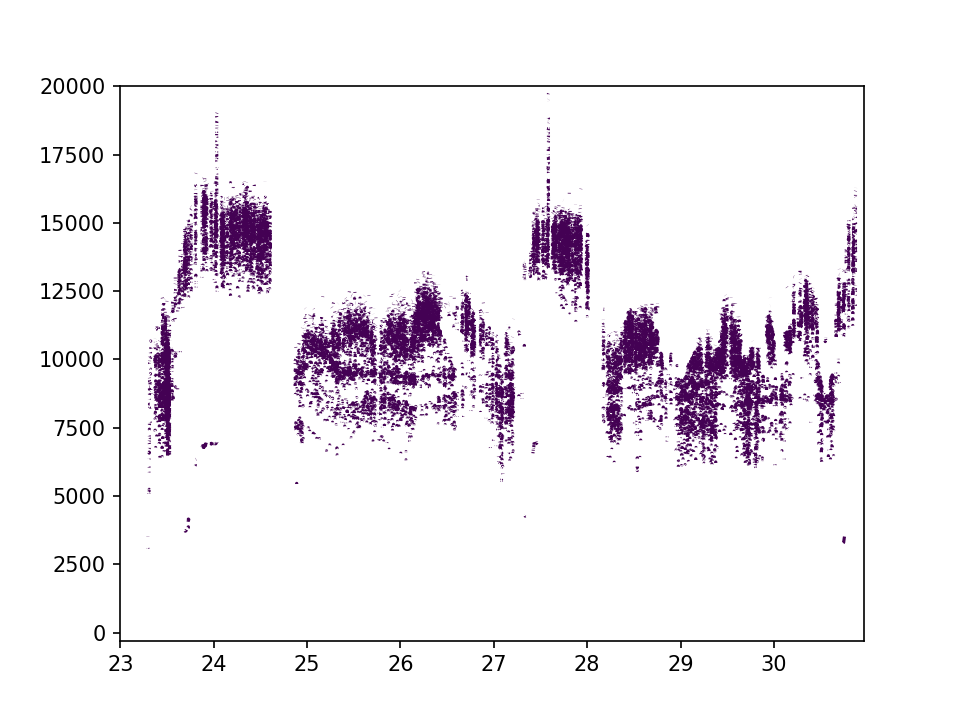

In [34]:
plt.figure()
plt.contour(da['//Nav_Data/Midtime'].flatten()/60.0/60.0,da['//Nav_Data/Altitudes'].flatten(),da['//Data_Products/depol_532nm_prfl'])


<IPython.core.display.Javascript object>


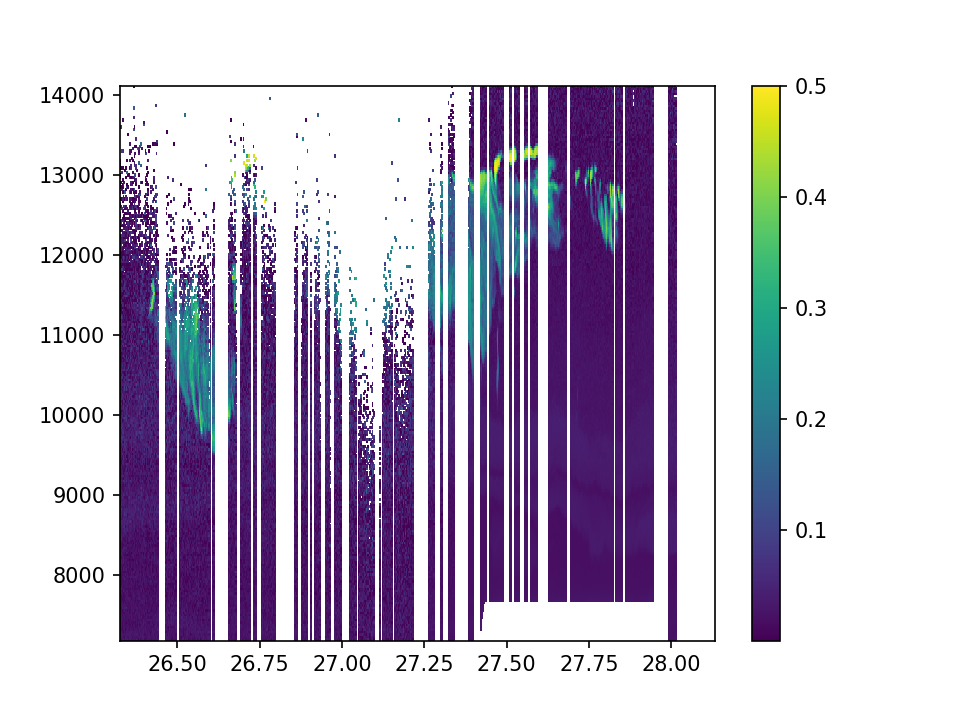

In [38]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime'].flatten()/60.0/60.0,da['//Nav_Data/Altitudes'].flatten(),da['//Data_Products/depol_532nm_prfl'],
          vmin=0.00001, vmax=0.5)
plt.colorbar()


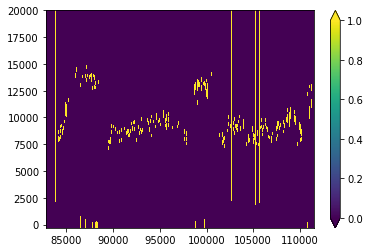

In [7]:
plt.figure()
plt.pcolor(da['//Nav_Data/Midtime'],da['//Nav_Data/Altitudes'],da['//Data_Products/Cloud_Mask_prfl'])
plt.colorbar(extend='both')

# Load rtm model data

In [3]:
import load_utils as lu

In [5]:
rtm,rtmd = lu.load_netcdf('/home/sam/unl-vrtm/unl-vrtm-2.1/run/O3band.unlvrtm.nc',everything=True)

Reading file: /home/sam/unl-vrtm/unl-vrtm-2.1/run/O3band.unlvrtm.nc
Outputting the Data subdatasets:
0: Lamdas
1: Wavenum
2: FWHM
3: IAtm
4: ZS
5: PS
6: SZA
7: VZA
8: RAZ
9: LOut
10: SSC
11: S0
12: TS
13: Gas
14: GasMW
15: GasSF
16: ModeFrc
17: MR
18: MI
19: PSDRange
20: PSDId
21: PSDPars
22: ProfRange
23: ProfId
24: ProfPars
25: LinPar
26: Z
27: P
28: T
29: LayP
30: LayT
31: AirDen
32: GasMR
33: AerVol
34: AerNum
35: PAngle
36: Bulk_AOP
37: Asymm
38: Dist
39: ExpCoeffs
40: FMatrix
41: LFrc_Bulk
42: Xsec_SAO
43: Xsec_LBL
44: Xsec_Combined
45: tauGas_SAO
46: tauGas_LBL
47: tauGas_Combined
48: Xsec_CTN
49: tauGas_CTN
50: tauGas
51: tauRayleigh
52: Rayleigh_FMatrix
53: tauAER
54: omegaAER
55: BRDFKernel
56: BRDFFactor
57: BRDFVal
58: GMat
59: tauIOP
60: omegaIOP
61: GMatIOP
62: tauLIOP
63: omegaLIOP
64: GMatLIOP
65: Geo_Offset
66: Stokes
67: Mean_Stokes
68: Flux_Stokes
69: Mean_Direct
70: Flux_Direct
71: Jacob_Column
72: tauAER_WFS
['Lamdas', 'Flux_Direct', 'FMatrix', 'Rayleigh_FMatrix', 

In [62]:
rtmd['LinPar']

<type 'netCDF4._netCDF4.Variable'>
|S1 LinPar(LinPar, Ch30)
    longname: Jacobian names
unlimited dimensions: 
current shape = (4, 30)
filling on, default _FillValue of   used

In [59]:
rtmd['tauAER_WFS']

<type 'netCDF4._netCDF4.Variable'>
float32 tauAER_WFS(Layer, LinPar, Spectra)
    longname: AOD profile Jacobians
    units: vary
unlimited dimensions: 
current shape = (33, 4, 16)
filling on, default _FillValue of 9.96920996839e+36 used

In [65]:
rtm['LinPar']

masked_array(
  data=[['A', 'O', 'D', '_', 'M', '0', '1', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' '],
        ['A', 'O', 'D', '_', 'M', '0', '2', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' '],
        ['S', 'S', 'A', '_', 'M', '0', '1', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' '],
        ['S', 'S', 'A', '_', 'M', '0', '2', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
         ' ', ' ', ' ', ' ']],
  mask=False,
  fill_value='N/A',
  dtype='|S1')

In [30]:
rtm['Flux_Direct']

masked_array(
  data=[[[[0.5961332 , 0.59565276, 0.5800349 , 0.47442824, 0.29319316,
           0.26103458, 0.30615473, 0.34005445, 0.4149549 , 0.49498355,
           0.5487711 , 0.5771491 , 0.5904318 , 0.5955029 , 0.59689593,
           0.5973232 ]]],


        [[[0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        ]]],


        [[[0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        ]]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

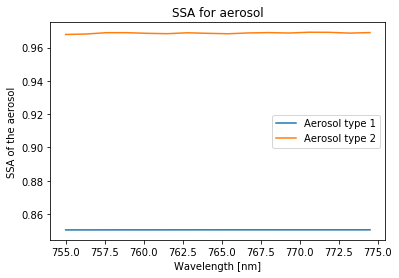

In [55]:
plt.figure()
plt.plot(rtm['Lamdas'],rtm['omegaAER'].T[:,0,0],label='Aerosol type 1')
plt.ylabel('SSA of the aerosol')
plt.xlabel('Wavelength [nm]')
plt.title('SSA for aerosol')


plt.plot(rtm['Lamdas'],rtm['omegaAER'].T[:,0,1],label='Aerosol type 2')
plt.legend()

Text(0.5,1,'SSA at various atmospheric layers')

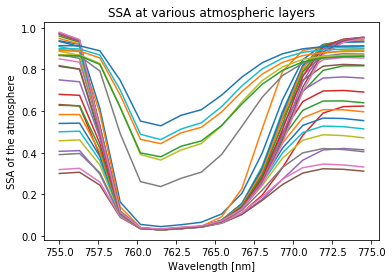

In [43]:
plt.figure()
plt.plot(rtm['Lamdas'],rtm['omegaIOP'].T)
plt.ylabel('SSA of the atmosphere')
plt.xlabel('Wavelength [nm]')
plt.title('SSA at various atmospheric layers')

Text(0.5,1,'Ox-A modeled direct beam irradiance UNL-VRTM')

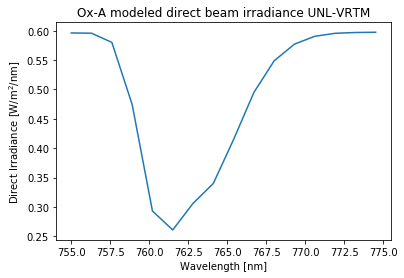

In [37]:
plt.figure()
plt.plot(rtm['Lamdas'],rtm['Flux_Direct'][0,0,0,:])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Direct Irradiance [W/m$^2$/nm]')
plt.title('Ox-A modeled direct beam irradiance UNL-VRTM')

## For 2 different ssa

In [70]:
rtm85_2,rtmd85_2 = lu.load_netcdf('/home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa085.unlvrtm.nc',everything=True)

Reading file: /home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa085.unlvrtm.nc
Outputting the Data subdatasets:
0: Lamdas
1: Wavenum
2: FWHM
3: IAtm
4: ZS
5: PS
6: SZA
7: VZA
8: RAZ
9: LOut
10: SSC
11: S0
12: TS
13: Gas
14: GasMW
15: GasSF
16: ModeFrc
17: MR
18: MI
19: PSDRange
20: PSDId
21: PSDPars
22: ProfRange
23: ProfId
24: ProfPars
25: LinPar
26: Z
27: P
28: T
29: LayP
30: LayT
31: AirDen
32: GasMR
33: AerVol
34: AerNum
35: PAngle
36: Bulk_AOP
37: Asymm
38: Dist
39: ExpCoeffs
40: FMatrix
41: LFrc_Bulk
42: Xsec_SAO
43: Xsec_LBL
44: Xsec_Combined
45: tauGas_SAO
46: tauGas_LBL
47: tauGas_Combined
48: Xsec_CTN
49: tauGas_CTN
50: tauGas
51: tauRayleigh
52: Rayleigh_FMatrix
53: tauAER
54: omegaAER
55: BRDFKernel
56: BRDFFactor
57: BRDFVal
58: GMat
59: tauIOP
60: omegaIOP
61: GMatIOP
62: tauLIOP
63: omegaLIOP
64: GMatLIOP
65: Geo_Offset
66: Stokes
67: Mean_Stokes
68: Flux_Stokes
69: Mean_Direct
70: Flux_Direct
71: Jacob_Column
72: tauAER_WFS
['Lamdas', 'Flux_Direct', 'FMatrix', 'Rayleigh_FMatri

In [67]:
rtm97,rtmd97 = lu.load_netcdf('/home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa097.unlvrtm.nc',everything=True)

Reading file: /home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa097.unlvrtm.nc
Outputting the Data subdatasets:
0: Lamdas
1: Wavenum
2: FWHM
3: IAtm
4: ZS
5: PS
6: SZA
7: VZA
8: RAZ
9: LOut
10: SSC
11: S0
12: TS
13: Gas
14: GasMW
15: GasSF
16: ModeFrc
17: MR
18: MI
19: PSDRange
20: PSDId
21: PSDPars
22: ProfRange
23: ProfId
24: ProfPars
25: LinPar
26: Z
27: P
28: T
29: LayP
30: LayT
31: AirDen
32: GasMR
33: AerVol
34: AerNum
35: PAngle
36: Bulk_AOP
37: Asymm
38: Dist
39: ExpCoeffs
40: FMatrix
41: LFrc_Bulk
42: Xsec_SAO
43: Xsec_LBL
44: Xsec_Combined
45: tauGas_SAO
46: tauGas_LBL
47: tauGas_Combined
48: Xsec_CTN
49: tauGas_CTN
50: tauGas
51: tauRayleigh
52: Rayleigh_FMatrix
53: tauAER
54: omegaAER
55: BRDFKernel
56: BRDFFactor
57: BRDFVal
58: GMat
59: tauIOP
60: omegaIOP
61: GMatIOP
62: tauLIOP
63: omegaLIOP
64: GMatLIOP
65: Geo_Offset
66: Stokes
67: Mean_Stokes
68: Flux_Stokes
69: Mean_Direct
70: Flux_Direct
71: Jacob_Column
72: tauAER_WFS
['Lamdas', 'Flux_Direct', 'FMatrix', 'Rayleigh_FMatri

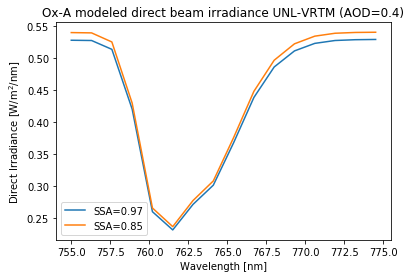

In [68]:
plt.figure()
plt.plot(rtm97['Lamdas'],rtm97['Flux_Direct'][0,0,0,:],label='SSA=0.97')
plt.plot(rtm85['Lamdas'],rtm85['Flux_Direct'][0,0,0,:],label='SSA=0.85')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Direct Irradiance [W/m$^2$/nm]')
plt.title('Ox-A modeled direct beam irradiance UNL-VRTM (AOD=0.4)')
plt.legend()

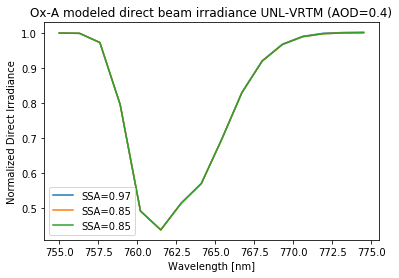

In [71]:
plt.figure()
plt.plot(rtm97['Lamdas'],rtm97['Flux_Direct'][0,0,0,:]/rtm97['Flux_Direct'][0,0,0,0],label='SSA=0.97')
plt.plot(rtm85['Lamdas'],rtm85['Flux_Direct'][0,0,0,:]/rtm85['Flux_Direct'][0,0,0,0],label='SSA=0.85')
plt.plot(rtm85['Lamdas'],rtm85_2['Flux_Direct'][0,0,0,:]/rtm85_2['Flux_Direct'][0,0,0,0],label='SSA=0.85')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized Direct Irradiance')
plt.title('Ox-A modeled direct beam irradiance UNL-VRTM (AOD=0.4)')
plt.legend()

In [72]:
rtm85_2['Flux_Direct'].shape

(3, 1, 1, 16)

In [73]:
rtm85['Flux_Direct'].shape

(3, 1, 1, 16)

In [77]:
rtm85_d,rtmd85_d = lu.load_netcdf('/home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa085_deg30.unlvrtm.nc',everything=True)
rtm97_d,rtmd97_d = lu.load_netcdf('/home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa098_deg30.unlvrtm.nc',everything=True)

Reading file: /home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa085_deg30.unlvrtm.nc
Outputting the Data subdatasets:
0: Lamdas
1: Wavenum
2: FWHM
3: IAtm
4: ZS
5: PS
6: SZA
7: VZA
8: RAZ
9: LOut
10: SSC
11: S0
12: TS
13: Gas
14: GasMW
15: GasSF
16: ModeFrc
17: MR
18: MI
19: PSDRange
20: PSDId
21: PSDPars
22: ProfRange
23: ProfId
24: ProfPars
25: LinPar
26: Z
27: P
28: T
29: LayP
30: LayT
31: AirDen
32: GasMR
33: AerVol
34: AerNum
35: PAngle
36: Bulk_AOP
37: Asymm
38: Dist
39: ExpCoeffs
40: FMatrix
41: LFrc_Bulk
42: Xsec_SAO
43: Xsec_LBL
44: Xsec_Combined
45: tauGas_SAO
46: tauGas_LBL
47: tauGas_Combined
48: Xsec_CTN
49: tauGas_CTN
50: tauGas
51: tauRayleigh
52: Rayleigh_FMatrix
53: tauAER
54: omegaAER
55: BRDFKernel
56: BRDFFactor
57: BRDFVal
58: GMat
59: tauIOP
60: omegaIOP
61: GMatIOP
62: tauLIOP
63: omegaLIOP
64: GMatLIOP
65: Geo_Offset
66: Stokes
67: Mean_Stokes
68: Flux_Stokes
69: Mean_Direct
70: Flux_Direct
71: Jacob_Column
72: tauAER_WFS
['Lamdas', 'Flux_Direct', 'FMatrix', 'Rayleigh_

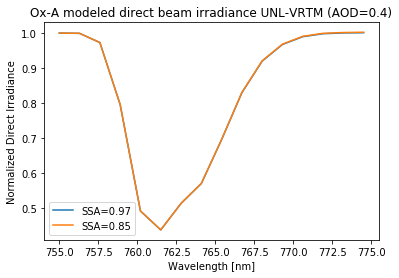

In [78]:
plt.figure()
plt.plot(rtm97_d['Lamdas'],rtm97_d['Flux_Direct'][0,0,0,:]/rtm97_d['Flux_Direct'][0,0,0,0],label='SSA=0.97')
plt.plot(rtm85_d['Lamdas'],rtm85_d['Flux_Direct'][0,0,0,:]/rtm85_d['Flux_Direct'][0,0,0,0],label='SSA=0.85')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized Direct Irradiance')
plt.title('Ox-A modeled direct beam irradiance UNL-VRTM (AOD=0.4)')
plt.legend()

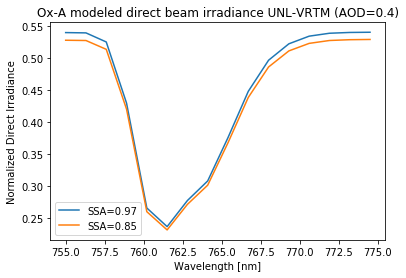

In [79]:
plt.figure()
plt.plot(rtm97_d['Lamdas'],rtm97_d['Flux_Direct'][0,0,0,:],label='SSA=0.97')
plt.plot(rtm85_d['Lamdas'],rtm85_d['Flux_Direct'][0,0,0,:],label='SSA=0.85')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized Direct Irradiance')
plt.title('Ox-A modeled direct beam irradiance UNL-VRTM (AOD=0.4)')
plt.legend()

In [80]:
import pyunlvrtm as pum

In [102]:
a = pum.read_unlvrtm('/home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa085_deg30.unlvrtm.nc')
b = pum.read_unlvrtm('/home/sam/unl-vrtm/unl-vrtm-2.1/run/OxA_ssa098_deg30.unlvrtm.nc')

In [103]:
a['Stokes']

masked_array(
  data=[[ 0.02380387,  0.02378829,  0.02310908,  0.01864282,  0.01131769,
          0.01005689,  0.01185367,  0.01320544,  0.01622713,  0.01952473,
          0.02180025,  0.02303378,  0.02362747,  0.0238626 ,  0.02393307,
          0.02396176],
        [-0.00200201, -0.00200337, -0.00194873, -0.00157432, -0.00095567,
         -0.00084994, -0.00100384, -0.00112075, -0.00138057, -0.00166444,
         -0.00186125, -0.00196924, -0.00202277, -0.00204572, -0.00205495,
         -0.0020605 ],
        [ 0.00137613,  0.00137703,  0.00133908,  0.00108086,  0.00065609,
          0.00058357,  0.00068918,  0.00076937,  0.00094766,  0.0011427 ,
          0.00127826,  0.00135289,  0.00138992,  0.00140587,  0.00141223,
          0.00141613]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

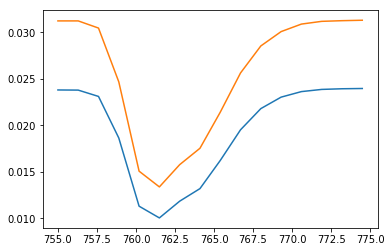

In [105]:
plt.figure()
plt.plot(a['Lamdas'],a['Stokes'][0,:])
plt.plot(b['Lamdas'],b['Stokes'][0,:])

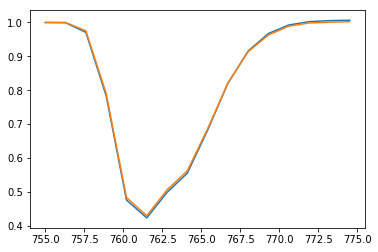

In [104]:
plt.figure()
plt.plot(a['Lamdas'],a['Stokes'][0,:]/a['Stokes'][0,0])
plt.plot(b['Lamdas'],b['Stokes'][0,:]/b['Stokes'][0,0])